# Weather Features

*Per hour*

- Temperature
- Wind Speed
- Precipitation Total

In [2]:
# package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
weather = pd.read_csv('../data/raw/1399048.csv', usecols=[5, 6, 10, 17, 24], dtype='object')
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather.set_index('DATE', inplace=True)
weather['temp'] = weather.HOURLYDRYBULBTEMPF.str.replace('[a-zA-Z]', '').astype('float')
weather['wind_speed'] = weather.HOURLYWindSpeed.str.replace('[a-zA-Z]', '').astype('float')
weather.HOURLYPrecip.replace({'T': '0.00'}, inplace=True)
weather['precipitation'] = weather.HOURLYPrecip.str.replace('[a-zA-Z]', '').astype('float')

# remove 'Summary of Day' Report
weather = weather[weather['REPORTTPYE'] != 'SOD']

weather = weather[['temp', 'wind_speed', 'precipitation']]

weather_by_hour = weather.resample('1h').max()

weather_by_hour['precipitation'] = weather_by_hour.precipitation.fillna(0)

In [145]:
temps = weather_by_hour.temp

In [150]:
temps_df = pd.DataFrame(temps)

In [155]:
temps_df['temp_interpolated'] = temps.interpolate()

In [229]:
temp_plot_dates = temps_df[temps_df.temp.isna()].resample('1w').max()

In [235]:
temp_plot_dates = temp_plot_dates[temp_plot_dates.temp_interpolated.notna()].index

In [240]:
temp_plot_dates = pd.DataFrame(index=temp_plot_dates)

In [252]:
check_times = temps_df[temps_df.temp.isna()].index.tolist()

In [284]:
'2012-03-19':'2012-03-22'
'2012-08-27':'2012-09-02'
'2013-09-11':'2013-09-14'
'2014-08-29':'2014-09-01'
'2016-09-04':'2016-09-07'
'2016-09-19':'2016-09-22'
'2017-10-20':'2017-10-24'
'2018-03-16':'2018-03-19'

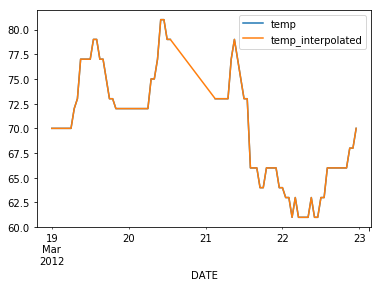

In [286]:
temps_df['2012-03-19':'2012-03-22'].plot()

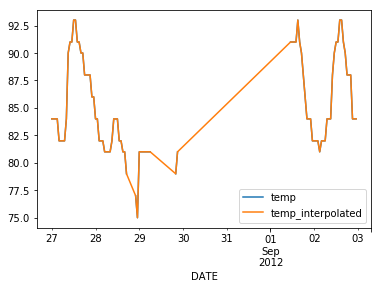

In [287]:
temps_df['2012-08-27':'2012-09-02'].plot()

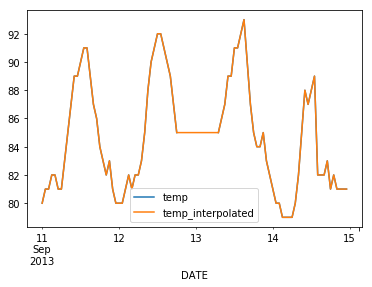

In [288]:
temps_df['2013-09-11':'2013-09-14'].plot()

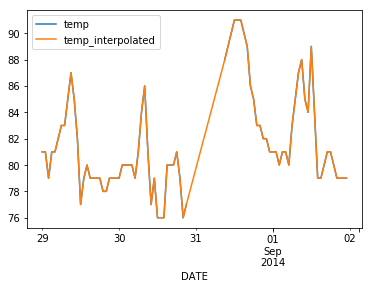

In [289]:
temps_df['2014-08-29':'2014-09-01'].plot()

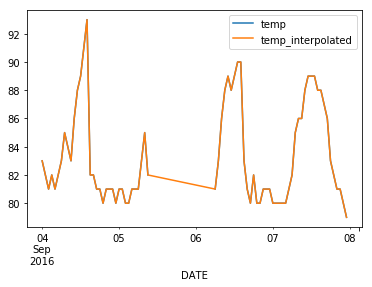

In [290]:
temps_df['2016-09-04':'2016-09-07'].plot()

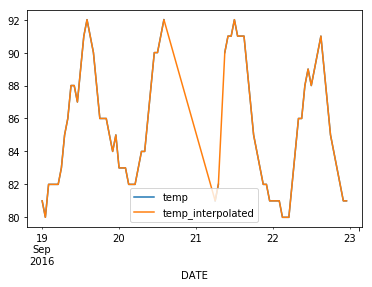

In [291]:
temps_df['2016-09-19':'2016-09-22'].plot()

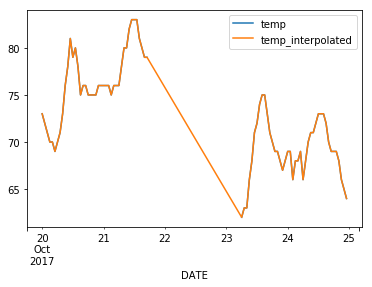

In [292]:
temps_df['2017-10-20':'2017-10-24'].plot()

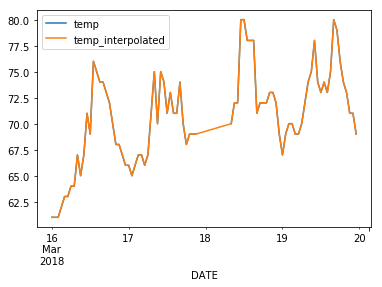

In [293]:
temps_df['2018-03-16':'2018-03-19'].plot()

# TODO

Need a better method to fill in missing temp values